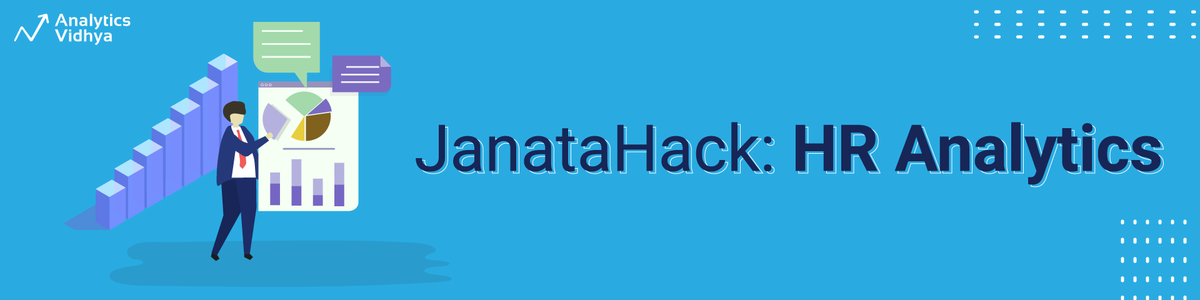

In [100]:
from PIL import Image
read_image=Image.open('/JanataHack: HR Analytics/JanataHack-HR-Analytics.png')
read_image

HR analytics is revolutionising the way human resources departments operate, leading to higher efficiency and better results overall. Human resources has been using analytics for years. However, the collection, processing and analysis of data has been largely manual, and given the nature of human resources dynamics and HR KPIs, the approach has been constraining HR. 

Therefore, it is surprising that HR departments woke up to the utility of machine learning so late in the game. This Janata Hack presents an opportunity to try predictive analytics in HR Domain, so gear up for another fun filled weekend



In [41]:
##Importing the packages
#Data processing packages
import numpy as np 
import pandas as pd 

#Visualization packages
import matplotlib.pyplot as plt 
import seaborn as sns 

#Machine Learning packages
from sklearn.svm import SVC,NuSVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,MultinomialNB
#from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
#from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
#from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
import lightgbm
#Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [42]:
#!pip install lightgbm

In [43]:
train=pd.read_csv('/home/kumar/Documents/Projects and Practices/projects/JanataHack: HR Analytics/train_jqd04QH.csv')
train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1


In [44]:
test=pd.read_csv('/home/kumar/Documents/Projects and Practices/projects/JanataHack: HR Analytics/test_KaymcHn.csv')
test.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,16548,city_33,0.448,NaN,No relevent experience,Full time course,Graduate,STEM,<1,1000-4999,Public Sector,NaN,15
1,12036,city_28,0.939,Male,No relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,94
2,11061,city_103,0.920,Male,No relevent experience,Full time course,Graduate,STEM,3,NaN,NaN,1,17
3,5032,city_104,0.924,Male,No relevent experience,no_enrollment,Phd,STEM,>20,50-99,Pvt Ltd,2,76
4,17599,city_77,0.830,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,<10,Pvt Ltd,2,65


In [45]:
train.shape,test.shape

((18359, 14), (15021, 13))

In [46]:
combine=train.append(test)

In [47]:
combine.shape

(33380, 14)

In [48]:
combine.isnull().sum()

enrollee_id                   0
city                          0
city_development_index        0
gender                     7486
relevent_experience           0
enrolled_university         621
education_level             852
major_discipline           5231
experience                  103
company_size               8830
company_type               9369
last_new_job                671
training_hours                0
target                    15021
dtype: int64

In [49]:
combine['company_size'].value_counts()

50-99        5697
100-500      4845
10000+       3666
10/49        2664
1000-4999    2513
<10          2464
500-999      1639
5000-9999    1062
Name: company_size, dtype: int64

In [50]:
combine['company_size'].fillna("Unknown", inplace=True)
combine['company_size'] = combine['company_size'].replace('50-99','com_Tier3')
combine['company_size'] = combine['company_size'].replace('100-500','com_Tier4')
combine['company_size'] = combine['company_size'].replace('10/49','com_Tier2')
combine['company_size'] = combine['company_size'].replace('10000+','com_Tier8')
combine['company_size'] = combine['company_size'].replace('1000-4999','com_Tier6')
combine['company_size'] = combine['company_size'].replace('<10','com_Tier1')
combine['company_size'] = combine['company_size'].replace('500-999','com_Tier5')
combine['company_size'] = combine['company_size'].replace('5000-9999','com_Tier7')
combine['company_size'].value_counts()

Unknown      8830
com_Tier3    5697
com_Tier4    4845
com_Tier8    3666
com_Tier2    2664
com_Tier6    2513
com_Tier1    2464
com_Tier5    1639
com_Tier7    1062
Name: company_size, dtype: int64

In [51]:
combine['gender'].value_counts()

Male      23462
Female     2085
Other       347
Name: gender, dtype: int64

In [52]:
combine.gender.fillna('Unknown',inplace=True)

In [53]:
#combine.relevent_experience.fillna('Unknown',inplace=True)

In [54]:
combine['relevent_experience'].value_counts()

Has relevent experience    24698
No relevent experience      8682
Name: relevent_experience, dtype: int64

In [55]:
combine.relevent_experience=combine.relevent_experience.replace('Has relevent experience','Yes_RExp')
combine.relevent_experience=combine.relevent_experience.replace('No relevent experience','No_RExp')

In [56]:
combine['enrolled_university'].value_counts()

no_enrollment       24887
Full time course     5752
Part time course     2120
Name: enrolled_university, dtype: int64

In [57]:
combine.enrolled_university.fillna('Unknown',inplace=True)

In [58]:
combine.education_level.value_counts()

Graduate          19512
Masters            7797
High School        3708
Phd                 881
Primary School      630
Name: education_level, dtype: int64

In [59]:
combine.education_level.fillna(value=0,inplace=True)
combine.education_level=combine.education_level.replace('Graduate',3)
combine.education_level=combine.education_level.replace('Masters',4)
combine.education_level=combine.education_level.replace('High School',2)
combine.education_level=combine.education_level.replace('Phd',5)
combine.education_level=combine.education_level.replace('Primary School',1)

In [60]:
combine['major_discipline'].value_counts()

STEM               24855
Humanities          1212
Other                678
Business Degree      585
Arts                 432
No Major             387
Name: major_discipline, dtype: int64

In [61]:
combine.major_discipline.fillna('Unknown',inplace=True)
combine.major_discipline=combine.major_discipline.replace('Business Degree','Business_Degree')
combine.major_discipline=combine.major_discipline.replace('No Major','No_Major')

In [62]:
combine['experience'].value_counts()

>20    6150
5      2400
4      2240
3      2166
6      2039
7      1779
2      1756
10     1753
9      1722
8      1423
15     1244
11     1190
14     1080
16      964
12      905
1       818
<1      782
13      763
17      659
19      590
18      533
20      321
Name: experience, dtype: int64

In [63]:
combine.experience.fillna(-1,inplace=True)
combine.experience=combine.experience.replace('>20',21)
combine.experience=combine.experience.replace('<1',0)
combine['experience'] = combine['experience'].astype('int')

In [64]:
bins= [-1,0,3,6,9,12,15,18,21]
labels = ['Unknown','Exp_Tier1','Exp_Tier2','Exp_Tier3','Exp_Tier4','Exp_Tier5','Exp_Tier6','Exp_Tier7']
combine.experience = pd.cut(combine.experience, bins=bins, labels=labels, right=False)
combine.experience.value_counts()

Exp_Tier2    6806
Exp_Tier3    5241
Exp_Tier4    4665
Exp_Tier1    3356
Exp_Tier6    2867
Exp_Tier5    2748
Exp_Tier7    1444
Unknown       103
Name: experience, dtype: int64

In [65]:
combine['company_type'].value_counts()

Pvt Ltd                18114
Funded Startup          1880
Public Sector           1792
Early Stage Startup     1029
NGO                      973
Other                    223
Name: company_type, dtype: int64

In [66]:
combine.company_type.fillna("Unknown", inplace=True)
combine.company_type=combine.company_type.replace('Pvt Ltd','Pvt_Ltd')
combine.company_type=combine.company_type.replace('Funded Startup','Funded_Startup')
combine.company_type=combine.company_type.replace('Public Sector','Public_Sector')
combine.company_type=combine.company_type.replace('Early Stage Startup','Early_Stage_Startup')

In [67]:
combine.last_new_job.value_counts()

1        13813
>4        6023
2         5133
never     3943
3         1922
4         1875
Name: last_new_job, dtype: int64

In [68]:
combine.last_new_job.fillna(-1,inplace=True)
combine.last_new_job=combine.last_new_job.replace('>4',5)
combine.last_new_job=combine.last_new_job.replace('never',0)
combine.last_new_job=combine.last_new_job.astype(int)

In [69]:
combine.training_hours.describe()

count    33380.000000
mean        65.565638
std         60.363572
min          1.000000
25%         23.000000
50%         47.000000
75%         89.000000
max        336.000000
Name: training_hours, dtype: float64

In [70]:
combine.training_hours=np.log(combine.training_hours)

In [71]:
combine.training_hours.describe()

count    33380.000000
mean         3.759840
std          0.995878
min          0.000000
25%          3.135494
50%          3.850148
75%          4.488636
max          5.817111
Name: training_hours, dtype: float64

In [72]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33380 entries, 0 to 15020
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   enrollee_id             33380 non-null  int64   
 1   city                    33380 non-null  object  
 2   city_development_index  33380 non-null  float64 
 3   gender                  33380 non-null  object  
 4   relevent_experience     33380 non-null  object  
 5   enrolled_university     33380 non-null  object  
 6   education_level         33380 non-null  int64   
 7   major_discipline        33380 non-null  object  
 8   experience              27230 non-null  category
 9   company_size            33380 non-null  object  
 10  company_type            33380 non-null  object  
 11  last_new_job            33380 non-null  int64   
 12  training_hours          33380 non-null  float64 
 13  target                  18359 non-null  float64 
dtypes: category(1), float6

In [73]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
combine['city'] = encoder.fit_transform(combine['city'])

In [74]:
combine.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,41,0.689,Male,Yes_RExp,no_enrollment,3,STEM,Exp_Tier2,com_Tier4,Pvt_Ltd,1,4.663439,0.0
1,29166,112,0.923,Male,Yes_RExp,no_enrollment,3,STEM,Exp_Tier5,com_Tier1,Funded_Startup,1,4.234107,0.0
2,46,48,0.910,Unknown,Yes_RExp,no_enrollment,3,STEM,Exp_Tier3,com_Tier3,Public_Sector,2,1.386294,0.0
3,18527,93,0.666,Male,Yes_RExp,no_enrollment,3,STEM,Exp_Tier5,com_Tier3,Pvt_Ltd,1,3.258097,0.0
4,21751,2,0.887,Unknown,No_RExp,no_enrollment,4,STEM,Exp_Tier3,Unknown,Unknown,2,4.477337,1.0


In [75]:
train_cleaned = combine[combine['target'].isnull()!=True].drop(['enrollee_id'], axis=1)

In [76]:
train_cleaned.head()

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,41,0.689,Male,Yes_RExp,no_enrollment,3,STEM,Exp_Tier2,com_Tier4,Pvt_Ltd,1,4.663439,0.0
1,112,0.923,Male,Yes_RExp,no_enrollment,3,STEM,Exp_Tier5,com_Tier1,Funded_Startup,1,4.234107,0.0
2,48,0.910,Unknown,Yes_RExp,no_enrollment,3,STEM,Exp_Tier3,com_Tier3,Public_Sector,2,1.386294,0.0
3,93,0.666,Male,Yes_RExp,no_enrollment,3,STEM,Exp_Tier5,com_Tier3,Pvt_Ltd,1,3.258097,0.0
4,2,0.887,Unknown,No_RExp,no_enrollment,4,STEM,Exp_Tier3,Unknown,Unknown,2,4.477337,1.0


In [77]:
combine=pd.get_dummies(combine)

In [78]:
combine.shape

(33380, 48)

In [79]:
X= combine[combine['target'].isnull()!=True].drop(['enrollee_id','target'], axis=1)
y = combine[combine['target'].isnull()!=True]['target']

x_test = combine[combine['target'].isnull()==True].drop(['enrollee_id','target'], axis=1)

X.shape, y.shape, x_test.shape

((18359, 46), (18359,), (15021, 46))

In [80]:
X.shape, y.shape, x_test.shape

((18359, 46), (18359,), (15021, 46))

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [82]:
from sklearn.pipeline import Pipeline

pipeline_lr=Pipeline([('scaler1',StandardScaler()),
                      ('pca1',PCA(n_components=2)),
                      ('lr_classifier',LogisticRegression(random_state=0))])

pipeline_svc=Pipeline([('scaler2',StandardScaler()),
                      ('pca2',PCA(n_components=2)),
                      ('svc_classifier',SVC(random_state=0))])

pipeline_dt=Pipeline([('scaler3',StandardScaler()),
                      ('pca3',PCA(n_components=2)),
                      ('dt_classifier',DecisionTreeClassifier(random_state=0))])

pipeline_rf=Pipeline([('scaler4',StandardScaler()),
                      ('pca4',PCA(n_components=2)),
                      ('rf_classifier',RandomForestClassifier(random_state=0))])

pipeline_xgb=Pipeline([('scaler5',StandardScaler()),
                      ('pca5',PCA(n_components=2)),
                      ('xgb_classifier',XGBClassifier(random_state=0))])

pipeline_lgb=Pipeline([('scaler6',StandardScaler()),
                      ('pca6',PCA(n_components=2)),
                      ('lgb_classifier',LGBMClassifier(random_state=0))])

In [83]:
pipelines=[pipeline_lr,pipeline_svc,pipeline_dt,pipeline_rf,pipeline_xgb,pipeline_lgb]

In [84]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [85]:
pipe_dic={0:'logistic regression',1:'SVC',2:'Decision Tree',3:'Random Forest',4:'XGBoost',5:'LGBoost'}

for pipe in pipelines:
    pipe.fit(X_train,y_train)

In [86]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dic[i],model.score(X_test,y_test)))

logistic regression Test Accuracy: 0.865831517792302
SVC Test Accuracy: 0.865831517792302
Decision Tree Test Accuracy: 0.7728758169934641
Random Forest Test Accuracy: 0.8465867828612926
XGBoost Test Accuracy: 0.8612926652142339
LGBoost Test Accuracy: 0.8660130718954249


In [87]:

for i,model in enumerate(pipelines):
    if model.score(X_test,y_test)>best_accuracy:
        best_accuracy=model.score(X_test,y_test)
        best_pipeline=model
        best_classifier=i
print('Classifier with best accuracy score:{}'.format(pipe_dic[best_classifier]))

Classifier with best accuracy score:LGBoost


In [88]:
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression()

In [89]:
log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [90]:
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,auc

In [91]:
# make class predictions for the testing set
y_pred_test = log_reg.predict(X_test)

In [92]:
y_pred_train = log_reg.predict(X_train)

In [93]:
report_train = classification_report(y_train, y_pred_train)
print(report_train)

              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93     11165
         1.0       1.00      0.00      0.00      1686

    accuracy                           0.87     12851
   macro avg       0.93      0.50      0.47     12851
weighted avg       0.89      0.87      0.81     12851



In [94]:
report_test = classification_report(y_test, y_pred_test)
print(report_test)

              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93      4769
         1.0       0.00      0.00      0.00       739

    accuracy                           0.87      5508
   macro avg       0.43      0.50      0.46      5508
weighted avg       0.75      0.87      0.80      5508



In [95]:
from lightgbm import LGBMClassifier
model = LGBMClassifier(max_depth=5,
                       learning_rate=0.4, 
                       n_estimators=100)

In [96]:
model.fit(X_train,y_train,
          eval_set=[(X_train,y_train),(X_test, y_test.values)],
          eval_metric='auc',
          early_stopping_rounds=100,
          verbose=200)

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[100]	training's auc: 0.90604	training's binary_logloss: 0.25594	valid_1's auc: 0.628156	valid_1's binary_logloss: 0.404374


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.4, max_depth=5,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [97]:
pred_y = model.predict_proba(X_test)[:,1]

In [98]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
print(roc_auc_score(y_test, pred_y))
confusion_matrix(y_test, pred_y>0.5)

0.6281558475165643


array([[4695,   74],
       [ 711,   28]])

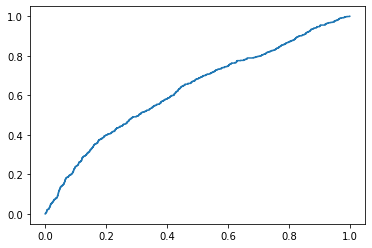

In [99]:
fpr, tpr, thresholds = roc_curve(y_test, pred_y)
plt.plot(fpr,tpr)